In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds=pd.read_csv('/work/uo1075/b381754/Validation/MI_WAVE_BOUY/deepwater_bouy/m6_obs_new.csv')#,skiprows=[1,2])
MIS=pd.read_csv('/work/uo1075/b381754/Validation/m6_swanMI.csv')
wam5=xr.open_dataset('/work/uo1075/b381754/wam-swan/const/dayfiles/fine/WAVE2023092100.nc')
trial1=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_6hrly.csv')
trial2=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_MIwind.csv')
trial3=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_hrly.csv')
trial4=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_3hrly.csv')
trial5=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_daily.csv')
trial6=pd.read_csv('/work/uo1075/b381754/Validation/nested/M6_SWAN/M6_regridded_hrly.csv')

In [3]:
hs_m=wam5.hs.values
hsm=hs_m[:,56,38]
time_model=wam5.time.values
hsm=hsm[0:312:3]
time_model=time_model[0:312:3]

In [4]:
h_obs=ds['Sig Wave Height'].values
t_obs=ds['Date'].values
obs_h=h_obs[0:312:3]
t_o=t_obs[0:312:3]

In [5]:
import time

from datetime import date
print(t_obs[1])
print(type(t_obs[1]))
datetime.fromisoformat(t_obs[1])

21/09/2023 01:00:00
<class 'str'>


ValueError: Invalid isoformat string: '21/09/2023 01:00:00'

In [6]:
tw=pd.to_datetime(time_model)
to=pd.to_datetime(t_o)

/tmp/ipykernel_2908344/3905015623.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [10]:
h_MI=MIS['Hs_m6MI'].values
t_MI=MIS['time'].values
to=pd.to_datetime(t_o)
tMI=pd.to_datetime(t_MI)

/tmp/ipykernel_534944/2086276588.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [11]:
h_1=trial1['Hs_M6'].values
t_1=trial1['time'].values

In [12]:
to=pd.to_datetime(t_o)
t1=pd.to_datetime(t_1)

/tmp/ipykernel_534944/1482283370.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [13]:
h_2=trial2['Hs_M6'].values
t_2=trial2['time'].values

to=pd.to_datetime(t_o)
t2=pd.to_datetime(t_2)

/tmp/ipykernel_534944/2582904976.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [14]:
h_3=trial3['Hs_M6'].values
t_3=trial3['time'].values

to=pd.to_datetime(t_o)
t3=pd.to_datetime(t_3)

/tmp/ipykernel_534944/1691954883.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [15]:
h_4=trial4['Hs_M6'].values
t_4=trial4['time'].values

to=pd.to_datetime(t_o)
t4=pd.to_datetime(t_4)

/tmp/ipykernel_534944/815777554.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [16]:
h_5=trial5['Hs_M6'].values
t_5=trial5['time'].values

to=pd.to_datetime(t_o)
t5=pd.to_datetime(t_5)

/tmp/ipykernel_534944/1228898638.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


In [17]:
h_6=trial6['Hs_M6'].values
t_6=trial6['time'].values

to=pd.to_datetime(t_o)
t6=pd.to_datetime(t_6)

/tmp/ipykernel_534944/47472626.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  to=pd.to_datetime(t_o)


Text(0.5, 1.0, 'Comparison of SWH distribution from SWAN driven by 24 hourly ERA5 winds     \nand SWH distribution from M4 Buoy')

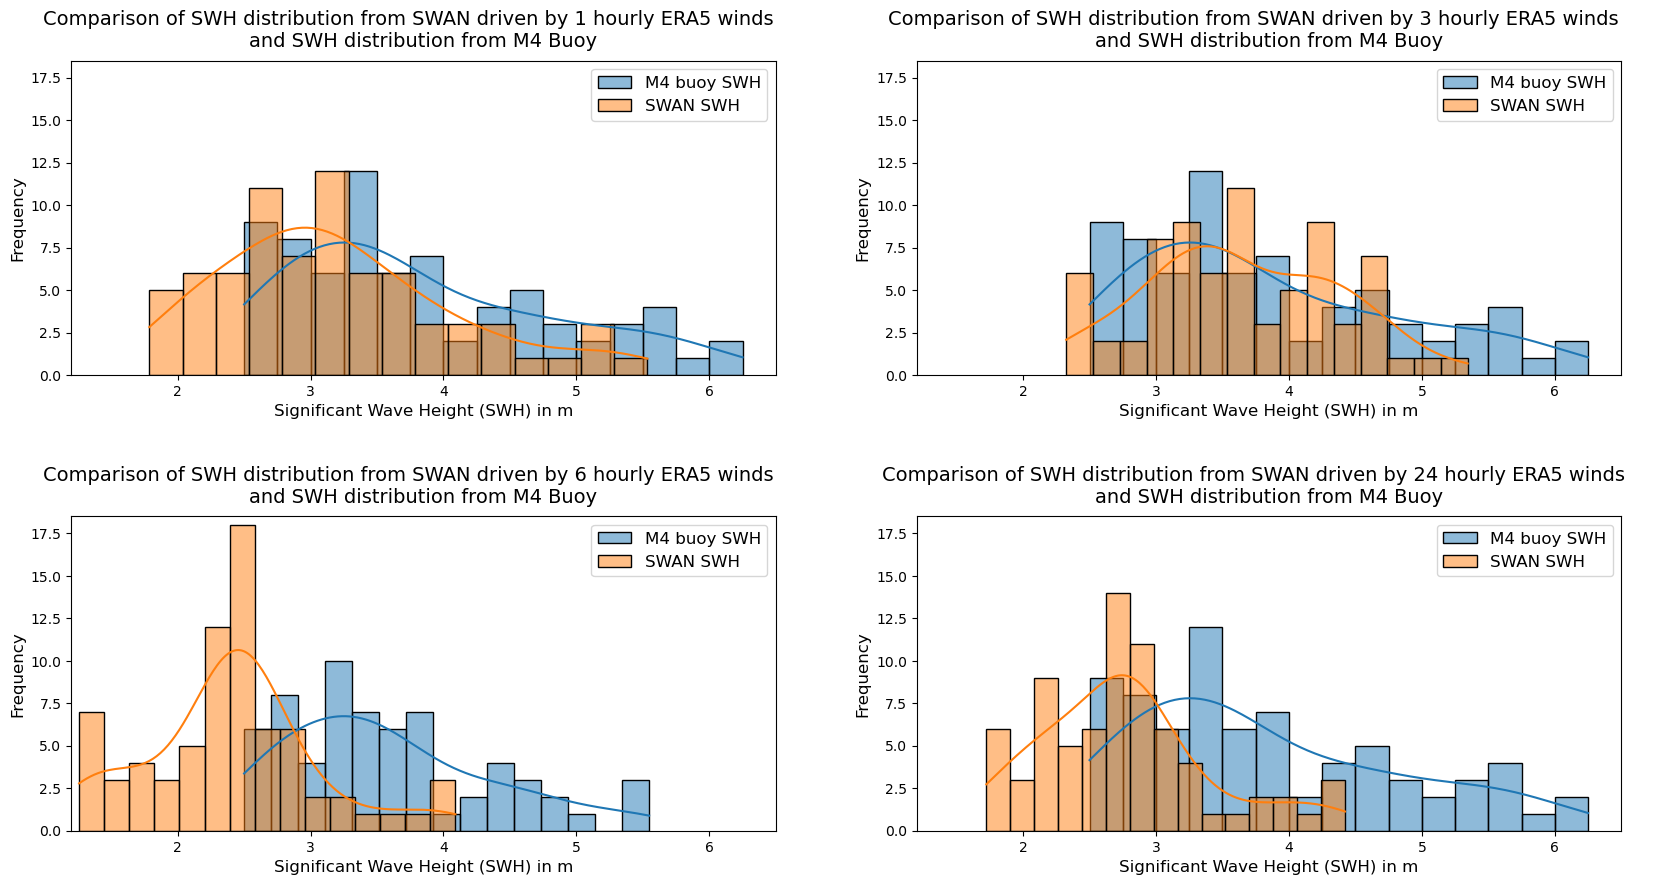

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.45, wspace=0.2)

# Subplot 1
ax = axes[0, 0]
sns.histplot(obs_h[30:104], kde=True, bins=15, label='M4 buoy SWH', ax=ax)
sns.histplot(h_3[30:104], kde=True, bins=15, label='SWAN SWH', ax=ax)
ax.set_xlim(1.2, 6.5)
ax.set_ylim(0, 18.5)
ax.set_xlabel('Significant Wave Height (SWH) in m', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(prop={'size': 12})
ax.set_title(
    'Comparison of SWH distribution from SWAN driven by 1 hourly ERA5 winds \
    \nand SWH distribution from M4 Buoy',
    loc='center', pad=10, fontsize=14
)

# Subplot 2
ax = axes[0, 1]
sns.histplot(obs_h[30:104], kde=True, bins=15, label='M4 buoy SWH', ax=ax)
sns.histplot(h_4[30:104], kde=True, bins=15, label='SWAN SWH', ax=ax)
ax.set_xlim(1.2, 6.5)
ax.set_ylim(0, 18.5)
ax.set_xlabel('Significant Wave Height (SWH) in m', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(prop={'size': 12})#, 'weight': 'bold'})
ax.set_title(
    'Comparison of SWH distribution from SWAN driven by 3 hourly ERA5 winds \
    \nand SWH distribution from M4 Buoy',
    loc='center', pad=10, fontsize=14
)

# Subplot 3
ax = axes[1, 0]
sns.histplot(obs_h[40:104], kde=True, bins=15, label='M4 buoy SWH', ax=ax)
sns.histplot(h_1[30:104], kde=True, bins=15, label='SWAN SWH', ax=ax)
ax.set_xlim(1.2, 6.5)
ax.set_ylim(0, 18.5)
ax.set_xlabel('Significant Wave Height (SWH) in m', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(prop={'size': 12})
ax.set_title(
    'Comparison of SWH distribution from SWAN driven by 6 hourly ERA5 winds \
    \nand SWH distribution from M4 Buoy',
    loc='center', pad=10, fontsize=14
)

# Subplot 4
ax = axes[1, 1]
sns.histplot(obs_h[30:104], kde=True, bins=15, label='M4 buoy SWH', ax=ax)
sns.histplot(h_5[30:104], kde=True, bins=15, label='SWAN SWH', ax=ax)
ax.set_xlim(1.2, 6.5)
ax.set_ylim(0, 18.5)
ax.set_xlabel('Significant Wave Height (SWH) in m', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(prop={'size': 12})
ax.set_title(
    'Comparison of SWH distribution from SWAN driven by 24 hourly ERA5 winds \
    \nand SWH distribution from M4 Buoy',
    loc='center', pad=10, fontsize=14
)

#plt.savefig('/work/uo1075/b381754/Validation/Distribution_plot/temporal analysis.png', bbox_inches='tight')#, bbox_extra_artists=[legend])
